In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
def precision_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FP[i]==0):
            TP[i]=0.00000001
            FP[i]=0.00000001
        sonuc+=(TP[i]/(TP[i]+FP[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc

def recall_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FN[i]==0):
            TP[i]=0.00000001
            FN[i]=0.00000001
        sonuc+=(TP[i]/(TP[i]+FN[i]))
       
    sonuc=sonuc/len(class_id)
    return sonuc
def accuracy_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=((TP[i]+TN[i])/(TP[i]+FP[i]+TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def specificity_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FP[i]==0):
            TN[i]=0.00000001
            FP[i]=0.00000001
        sonuc+=(TN[i]/(FP[i]+TN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def NPV_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FN[i]==0):
            TN[i]=0.00000001
            FN[i]=0.00000001
        sonuc+=(TN[i]/(TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [3]:
df=pd.read_csv("../input/bank-marketing-dataset/bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [10]:
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [11]:
new_values = {'no':0, 'yes':1} 
y = y.map(new_values)

x['loan'] = x['loan'].map(new_values)
x['housing'] = x['housing'].map(new_values)
x['default'] = x['default'].map(new_values)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown


In [12]:
education_labels = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
x['education'] = x['education'].map(education_labels)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,2,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,2,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,2,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,2,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,3,0,184,0,0,unknown,5,may,673,2,-1,0,unknown


In [13]:
for column in ['poutcome', 'contact', 'month']:
    dummies = pd.get_dummies(x[column], drop_first=True, prefix=column)
    x = pd.concat([x, dummies],axis=1)
    x.drop([column],axis=1, inplace=True)
x.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,admin.,married,2,0,2343,1,0,5,1042,...,0,0,0,0,0,0,1,0,0,0
1,56,admin.,married,2,0,45,0,0,5,1467,...,0,0,0,0,0,0,1,0,0,0
2,41,technician,married,2,0,1270,1,0,5,1389,...,0,0,0,0,0,0,1,0,0,0
3,55,services,married,2,0,2476,1,0,5,579,...,0,0,0,0,0,0,1,0,0,0
4,54,admin.,married,3,0,184,0,0,5,673,...,0,0,0,0,0,0,1,0,0,0


In [14]:
for column in ['job', 'marital']:
    dummies = pd.get_dummies(x[column], drop_first=True, prefix=column)
    x = pd.concat([x, dummies],axis=1)
    x.drop([column],axis=1, inplace=True)
x.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,59,2,0,2343,1,0,5,1042,1,-1,...,0,0,0,0,0,0,0,0,1,0
1,56,2,0,45,0,0,5,1467,1,-1,...,0,0,0,0,0,0,0,0,1,0
2,41,2,0,1270,1,0,5,1389,1,-1,...,0,0,0,0,0,1,0,0,1,0
3,55,2,0,2476,1,0,5,579,1,-1,...,0,0,0,1,0,0,0,0,1,0
4,54,3,0,184,0,0,5,673,2,-1,...,0,0,0,0,0,0,0,0,1,0


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 40 columns):
age                  11162 non-null int64
education            11162 non-null int64
default              11162 non-null int64
balance              11162 non-null int64
housing              11162 non-null int64
loan                 11162 non-null int64
day                  11162 non-null int64
duration             11162 non-null int64
campaign             11162 non-null int64
pdays                11162 non-null int64
previous             11162 non-null int64
poutcome_other       11162 non-null uint8
poutcome_success     11162 non-null uint8
poutcome_unknown     11162 non-null uint8
contact_telephone    11162 non-null uint8
contact_unknown      11162 non-null uint8
month_aug            11162 non-null uint8
month_dec            11162 non-null uint8
month_feb            11162 non-null uint8
month_jan            11162 non-null uint8
month_jul            11162 non-null uint8
month_jun

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x_scaled

array([[ 1.49150488, -0.13471972, -0.12361659, ..., -0.07944089,
         0.87035539, -0.67840272],
       [ 1.23967567, -0.13471972, -0.12361659, ..., -0.07944089,
         0.87035539, -0.67840272],
       [-0.0194704 , -0.13471972, -0.12361659, ..., -0.07944089,
         0.87035539, -0.67840272],
       ...,
       [-0.77495804, -0.13471972, -0.12361659, ..., -0.07944089,
        -1.14895595,  1.4740507 ],
       [ 0.14841574, -0.13471972, -0.12361659, ..., -0.07944089,
         0.87035539, -0.67840272],
       [-0.6070719 , -0.13471972, -0.12361659, ..., -0.07944089,
         0.87035539, -0.67840272]])

In [18]:
y=y.values

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
score_liste=[]
auc_scor=[]
precision_scor=[]
recall_scor=[]
f1_scor=[]
LR_plus=[]
LR_eksi=[]
odd_scor=[]
NPV_scor=[]
youden_scor=[]
specificity_scor=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

KNN Algoritması başarım sonucu:  0.7554493878769782


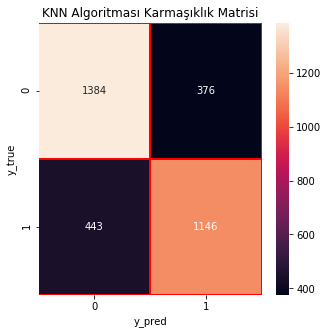

KNN algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      1760
           1       0.75      0.72      0.74      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.76      0.76      3349



In [21]:
k=7
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_head=knn.predict(x_test)
print("KNN Algoritması başarım sonucu: ",knn.score(x_test,y_test))

from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Algoritması Karmaşıklık Matrisi")
plt.show()

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
knn_fpr,knn_tpr,knn_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))

LR_plus.append((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))
LR_eksi.append(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp)))
odd_scor.append(((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))/(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp))))
youden_scor.append((recall_hesapla(classid,tn,fp,fn,tp)+specificity_hesapla(classid,tn,fp,fn,tp)-1))
print("KNN algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

Karar Ağaçları Algoritması için başarım sonucu:  0.792773962376829
DTC algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1760
           1       0.78      0.78      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



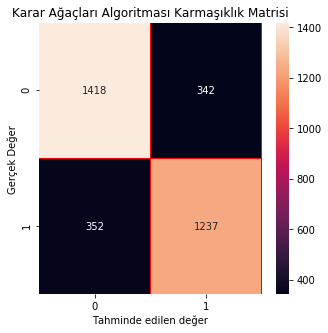

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_head=dtc.predict(x_test)
print("Karar Ağaçları Algoritması için başarım sonucu: ",dtc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
dtc_fpr,dtc_tpr,dtc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)

print("DTC algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmdtc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahminde edilen değer")
plt.ylabel("Gerçek Değer")
plt.title("Karar Ağaçları Algoritması Karmaşıklık Matrisi")
plt.show()

Rastgele Orman Algoritması başarım sonucu:  0.8489101224246044
Rastgele Orman algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1760
           1       0.81      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



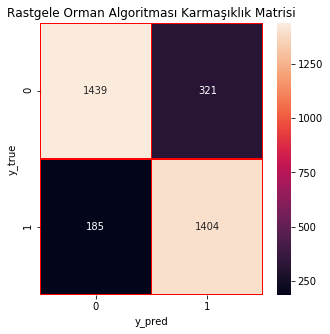

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=225,random_state=1)
rfc.fit(x_train,y_train)
y_head=rfc.predict(x_test)
print("Rastgele Orman Algoritması başarım sonucu: ",rfc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
rfc_fpr,rfc_tpr,rfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Rastgele Orman algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmrfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmrfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Rastgele Orman Algoritması Karmaşıklık Matrisi")
plt.show()

Naive Bayes Algoritması başarım sonucu:  0.7300686772170797
Naive Bayes algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.69      0.87      0.77      1760
           1       0.80      0.58      0.67      1589

    accuracy                           0.73      3349
   macro avg       0.75      0.72      0.72      3349
weighted avg       0.74      0.73      0.72      3349



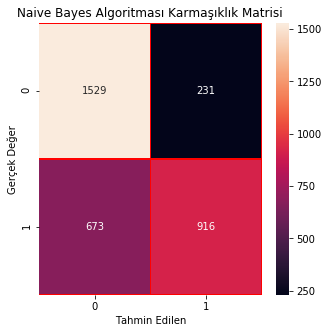

In [24]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_head=nb.predict(x_test)
print("Naive Bayes Algoritması başarım sonucu: ",nb.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
nb_fpr,nb_tpr,nb_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Naive Bayes algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmnb = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmnb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Naive Bayes Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regresyon Algoritması başarım sonucu:  0.8256195879366975
Lojistik Regresyon algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1760
           1       0.83      0.80      0.81      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.83      0.83      0.83      3349



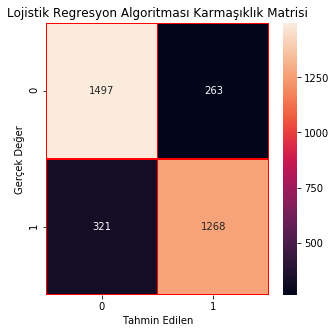

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_head=lr.predict(x_test)
print("Logistic Regresyon Algoritması başarım sonucu: ",lr.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
lrc_fpr,lrc_tpr,lrc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Lojistik Regresyon algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmlr = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlr,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Lojistik Regresyon Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Destek Vektör Makineleri Algoritması başarım sonucu:  0.5264257987458943
Destek Vektör Makineleri algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.53      0.97      0.68      1760
           1       0.52      0.03      0.06      1589

    accuracy                           0.53      3349
   macro avg       0.52      0.50      0.37      3349
weighted avg       0.52      0.53      0.39      3349



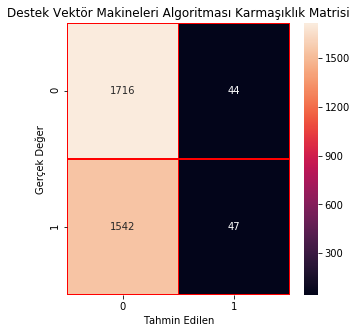

In [26]:
from sklearn.svm import SVC
svc=SVC(random_state=1)
svc.fit(x_train,y_train)
y_head=svc.predict(x_test)
print("Destek Vektör Makineleri Algoritması başarım sonucu: ",svc.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
svc_fpr,svc_tpr,svc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Destek Vektör Makineleri algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmsvc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmsvc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Destek Vektör Makineleri Algoritması Karmaşıklık Matrisi")
plt.show()

Gradient Boosting Classifier Algoritması başarım sonucu:  0.8584652134965661
Gradient Boosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1760
           1       0.83      0.88      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



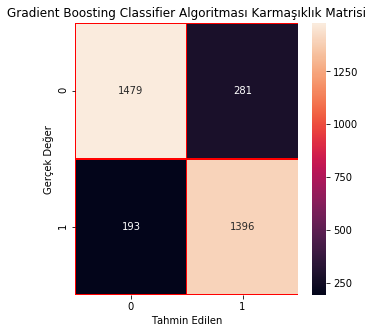

In [27]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(x_train,y_train)
y_head=gfc.predict(x_test)
print("Gradient Boosting Classifier Algoritması başarım sonucu: ",gfc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
gfc_fpr,gfc_tpr,gfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Gradient Boosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmgfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmgfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Gradient Boosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

AdaBoosting Classifier Algoritması başarım sonucu:  0.8286055538966856
AdaBoosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1760
           1       0.83      0.80      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



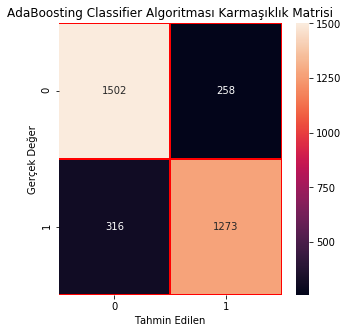

In [28]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train,y_train)
y_head=abc.predict(x_test)
print("AdaBoosting Classifier Algoritması başarım sonucu: ",abc.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
abc_fpr,abc_tpr,abc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("AdaBoosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmabc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmabc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("AdaBoosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

Yapay Sinir Ağları Algoritması başarım sonucu:  0.7187220065691251
Yapay Sinir Ağları algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.68      0.88      0.77      1760
           1       0.80      0.54      0.64      1589

    accuracy                           0.72      3349
   macro avg       0.74      0.71      0.71      3349
weighted avg       0.74      0.72      0.71      3349



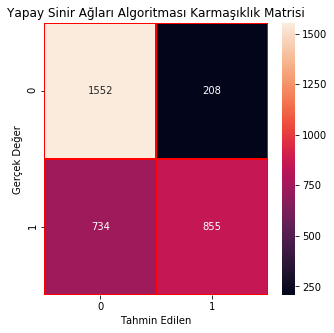

In [29]:
ysa=MLPClassifier(alpha=1, max_iter=1000)
ysa.fit(x_train,y_train)
y_head=ysa.predict(x_test)
print("Yapay Sinir Ağları Algoritması başarım sonucu: ",ysa.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
ysa_fpr,ysa_tpr,ysa_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Yapay Sinir Ağları algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmysa = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmysa,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Yapay Sinir Ağları Algoritması Karmaşıklık Matrisi")
plt.show()

In [30]:
algo_liste=["KNN","Decision Tree","Random Forest","Naive Bayes","Linear Regression","Support Vector Machine","Gradient Boosting Classifier","AdaBoosting Classifier","Neural Network"]
score={"algo_list":algo_liste,"score_liste":score_liste,"precision":precision_scor,"recall":recall_scor,"f1_score":f1_scor,"AUC":auc_scor,"LR+":LR_plus,"LR-":LR_eksi,"ODD":odd_scor,"YOUDEN":youden_scor,"Specificity":specificity_scor}

In [31]:
#df=pd.DataFrame(score)
#df

,algo_list,score_liste,precision,recall,f1_score,AUC,LR+,LR-,ODD,YOUDEN,Specificity
0,KNN,0.755449,0.755241,0.753786,0.754208,0.753786,3.061507,0.326637,9.372825,0.507572,0.753786
1,Decision Tree,0.792774,0.792269,0.792079,0.792167,0.792079,3.809529,0.262500,14.512510,0.584159,0.792079
2,Random Forest,0.848910,0.849998,0.850594,0.848894,0.850594,5.693176,0.175649,32.412257,0.701188,0.850594
3,Naive Bayes,0.730069,0.746487,0.722607,0.720712,0.722607,2.604988,0.383879,6.785964,0.445213,0.722607
4,Linear Regression,0.825620,0.825825,0.824277,0.824800,0.824277,4.690780,0.213184,22.003418,0.648554,0.824277
5,Support Vector Machine,0.526426,0.521594,0.502289,0.369945,0.502289,1.009199,0.990885,1.018482,0.004578,0.502289
6,Gradient Boosting Classifier,0.858465,0.858504,0.859440,0.858378,0.859440,6.114422,0.163548,37.386151,0.718881,0.859440
7,AdaBoosting Classifier,0.828606,0.828833,0.827271,0.827800,0.827271,4.789414,0.208794,22.938484,0.654542,0.827271
8,Neural Network,0.718722,0.741621,0.709946,0.705987,0.709946,2.447637,0.408557,5.990925,0.419892,0.709946


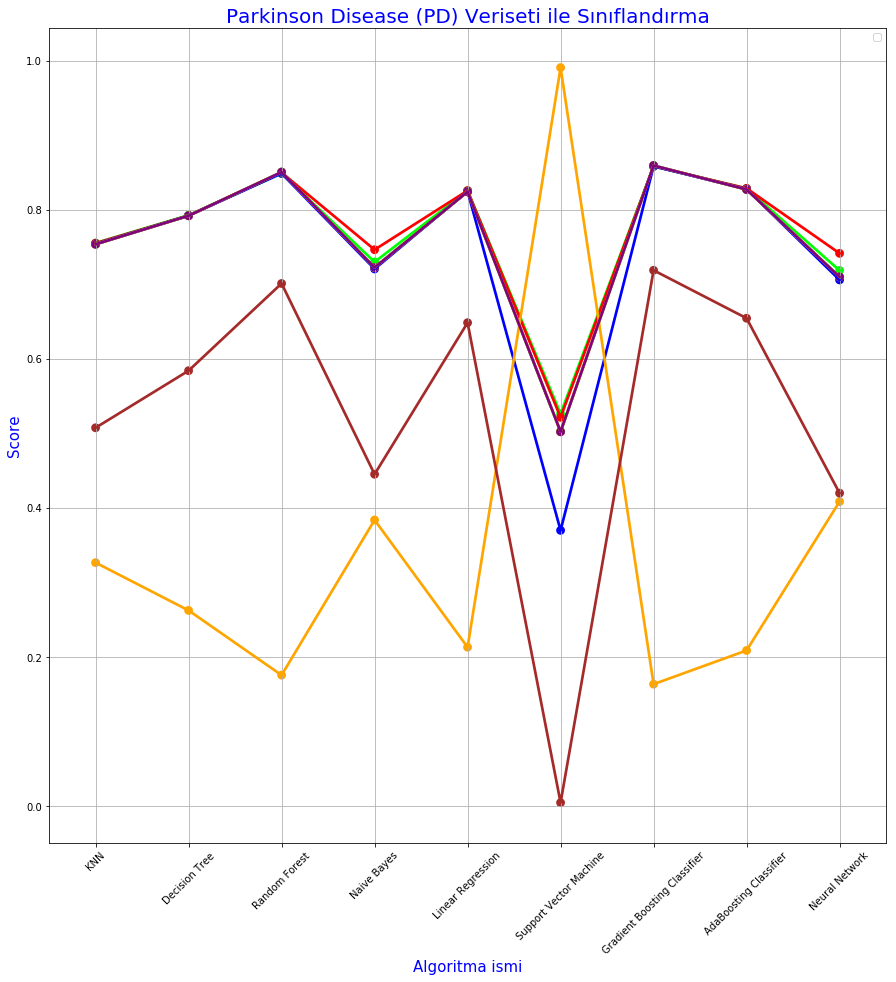

In [32]:
# f,ax1 = plt.subplots(figsize =(15,15))
# sns.pointplot(x=df['algo_list'], y=df['score_liste'],data=df,color='lime',alpha=0.8,label="score_liste")
# sns.pointplot(x=df['algo_list'], y=df['precision'],data=df,color='red',alpha=0.8,label="precision")
# sns.pointplot(x=df['algo_list'], y=df['recall'],data=df,color='black',alpha=0.8,label="recall")
# sns.pointplot(x=df['algo_list'], y=df['f1_score'],data=df,color='blue',alpha=0.8,label="f1_score")
# sns.pointplot(x=df['algo_list'], y=df['AUC'],data=df,color='yellow',alpha=0.8,label="AUC")

# sns.pointplot(x=df['algo_list'], y=df['LR-'],data=df,color='orange',alpha=0.8,label="YOUDEN")

# sns.pointplot(x=df['algo_list'], y=df['YOUDEN'],data=df,color='brown',alpha=0.8,label="LR-")
# sns.pointplot(x=df['algo_list'], y=df['Specificity'],data=df,color='purple',alpha=0.8,label="Specificity")
# plt.xlabel('Algoritma ismi',fontsize = 15,color='blue')
# plt.ylabel('Score',fontsize = 15,color='blue')
# plt.xticks(rotation= 45)
# plt.title('Parkinson Disease (PD) Veriseti ile Sınıflandırma',fontsize = 20,color='blue')
# plt.grid()
# plt.legend()
# plt.show()

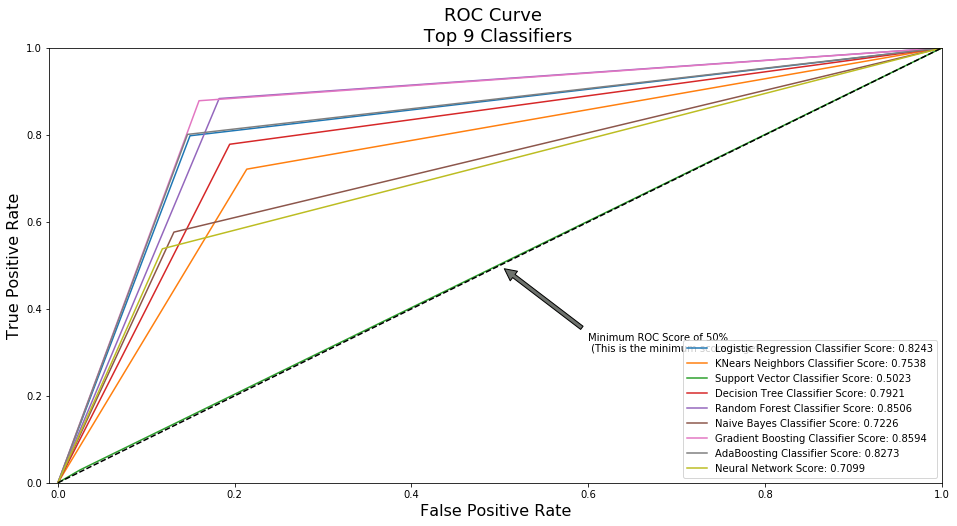

In [33]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gbc_fpr,gbc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 9 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr.predict(x_test))))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn.predict(x_test))))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc.predict(x_test))))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dtc.predict(x_test))))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rfc.predict(x_test))))
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, nb.predict(x_test))))
    plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, gfc.predict(x_test))))
    plt.plot(abc_fpr, abc_tpr, label='AdaBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, abc.predict(x_test))))
    plt.plot(ysa_fpr, ysa_tpr, label='Neural Network Score: {:.4f}'.format(roc_auc_score(y_test, ysa.predict(x_test))))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lrc_fpr, lrc_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dtc_fpr, dtc_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gfc_fpr,gfc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr)
plt.show()